<a href="https://colab.research.google.com/github/BaruaNirzar/Machine-learning-Lab/blob/main/Lab_06(DeepLearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ETE-456 Machine Learning Sessional
#1608017

Experiment Name: Deep learing using python.

Objective: 

1) To apply deep learning for a dataset and check different operations.

Here, at first data set is taken. The string type data are changed to numerical values. After that data set the trained and tested. after doing all the regression are done,Then accurecy was checked.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-19 21:24:47--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-19 21:24:48--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5d6428746cec23fc54a643bbb3.dl.dropboxusercontent.com/cd/0/inline/BcJ8cYN-NIj1QPK2wIvkyhmtq4Jybo_mHf_5qBJkfAUYrvZ0pac4zMeoBjcv5xqQpYfZrTrznMSB_g61EREUh7jWfqEpShhtRYHDREmyFRhKrtS9dlRrqTcDOMyVa6TtvzliCqmjryb9dByLWf0XdZ-n/file# [following]
--2021-12-19 21:24:48--  https://uc5d6428746cec23fc54a643bbb3.dl.dropboxusercontent.com/cd/0/inline/BcJ8cYN-NIj1QPK2wIvkyhmtq4Jybo_mHf_5qBJkfAUYrvZ0pac4zMeoBjcv5xqQpYfZrTrznMSB_g61EREUh

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
print(dataset[pd.isnull(dataset.Pregnancies)])
print(dataset[pd.isnull(dataset.Glucose)])
print(dataset[pd.isnull(dataset.BloodPressure)])
print(dataset[pd.isnull(dataset.SkinThickness)])
print(dataset[pd.isnull(dataset.Insulin)])
print(dataset[pd.isnull(dataset.BMI)])
print(dataset[pd.isnull(dataset.DiabetesPedigreeFunction)])
print(dataset[pd.isnull(dataset.Age)])
print(dataset[pd.isnull(dataset.Outcome)])

In [ ]:
feature = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = dataset[['Outcome']] 

In [ ]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)

print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


In [ ]:
x_sc = StandardScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1)

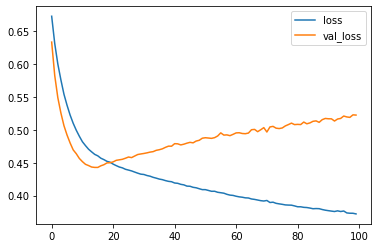

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

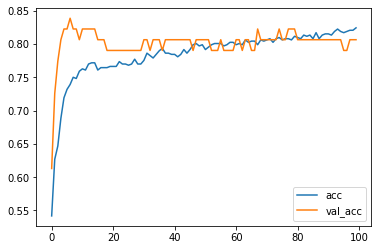

In [ ]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
pred = y_pred.astype('uint8')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154



Final Result:

precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47
    accuracy                           0.78       154

   macro avg       0.74      0.73      0.73       154

weighted avg       0.77      0.78      0.78       154

Conclusion:

Here all the operations are used. After the operations Macro average, weighted average are calculated to measure the efficiency of the system.